In [1]:
import numpy as np
from scipy import stats

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("darkgrid")


In [2]:
#pip install xlrd

jupyter nbconvert simples.ipynb --to pdf

use this line to compile notebook into pdf from terminal command line

# Analysis of firms

In [3]:
firms = pd.read_excel("data_final.xlsx")

In [4]:
firms.head()

,sheet,firms_real_11,firms_real_12,firms_real_13,firms_real_14,firms_real_15,firms_presumed_11,firms_presumed_12,firms_presumed_13,firms_presumed_14,...,firms_waived_11,firms_waived_12,firms_waived_13,firms_waived_14,firms_waived_15,firms_total_11,firms_total_12,firms_total_13,firms_total_14,firms_total_15
0,1,147500,146779,150531,144307,149210,839544,853367,878787,978776,...,302421,300192,296852,60724,199560,4679612,4826589,4926744,5219958,5421516
1,4,567,545,542,543,576,1392,1553,1727,2168,...,123,123,114,122,168,2671,2855,3029,3618,3902
2,7,39,36,45,42,44,150,164,175,148,...,46,42,48,16,24,1133,1139,1216,1297,1307
3,10,368,357,362,320,328,599,659,697,728,...,58,50,55,15,30,1560,1648,1737,1804,1894
4,13,54,53,58,56,61,158,166,175,176,...,2,2,1,2,4,423,449,479,525,558


## plots of 

In [5]:
real = ["firms_real_11", "firms_real_12", "firms_real_13", "firms_real_14", "firms_real_15"]
presumed = ["firms_presumed_11", "firms_presumed_12", "firms_presumed_13", "firms_presumed_14", "firms_presumed_15"]
simples = ["firms_simples_11", "firms_simples_12", "firms_simples_13", "firms_simples_14", "firms_simples_15"]
waived = ["firms_waived_11", "firms_waived_12", "firms_waived_13", "firms_waived_14", "firms_waived_15"]
total = ["firms_total_11", "firms_total_12", "firms_total_13", "firms_total_14", "firms_total_15"]

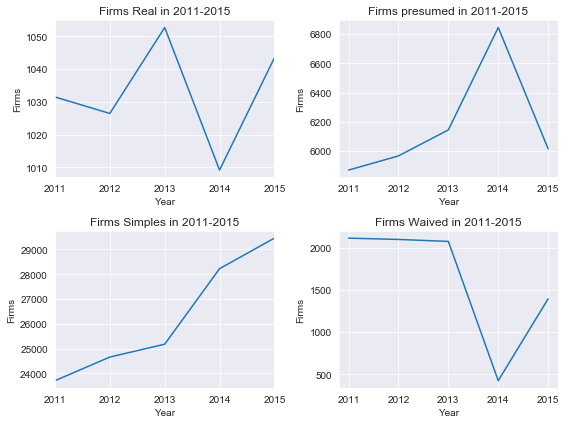

In [6]:
plt.figure(figsize = (8,6))

plt.subplot(2,2,1)
plt.plot(np.arange(2011,2016,1), np.mean(firms[real]))
plt.title("Firms Real in 2011-2015")
plt.xlabel("Year")
plt.ylabel("Firms")
plt.xlim(2011,2015)

plt.subplot(2,2,2)
plt.plot(np.arange(2011,2016,1), np.mean(firms[presumed]))
plt.title("Firms presumed in 2011-2015")
plt.xlabel("Year")
plt.ylabel("Firms")


plt.subplot(2,2,3)
plt.plot(np.arange(2011,2016,1), np.mean(firms[simples]))
plt.title("Firms Simples in 2011-2015")
plt.xlabel("Year")
plt.ylabel("Firms")
plt.xlim(2011,2015,1)

plt.subplot(2,2,4)
plt.plot(np.arange(2011,2016,1), np.mean(firms[waived]))
plt.title("Firms Waived in 2011-2015")
plt.xlabel("Year")
plt.ylabel("Firms")

plt.tight_layout()
plt.show()

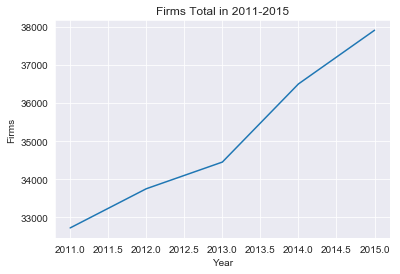

In [7]:
plt.figure(figsize = (6,4))
plt.plot(np.arange(2011,2016,1), np.mean(firms[total]))
plt.title("Firms Total in 2011-2015")
plt.xlabel("Year")
plt.ylabel("Firms")
plt.show()

In [8]:
means = (np.mean(firms[total]), np.mean(firms[real]), np.mean(firms[presumed]), 
         np.mean(firms[simples]), np.mean(firms[waived]))
means

(firms_total_11    32724.559441
 firms_total_12    33752.370629
 firms_total_13    34452.755245
 firms_total_14    36503.202797
 firms_total_15    37912.699301
 dtype: float64, firms_real_11    1031.468531
 firms_real_12    1026.426573
 firms_real_13    1052.664336
 firms_real_14    1009.139860
 firms_real_15    1043.426573
 dtype: float64, firms_presumed_11    5870.937063
 firms_presumed_12    5967.601399
 firms_presumed_13    6145.363636
 firms_presumed_14    6844.587413
 firms_presumed_15    6016.293706
 dtype: float64, firms_simples_11    23707.321678
 firms_simples_12    24659.097902
 firms_simples_13    25178.839161
 firms_simples_14    28224.832168
 firms_simples_15    29457.454545
 dtype: float64, firms_waived_11    2114.828671
 firms_waived_12    2099.244755
 firms_waived_13    2075.888112
 firms_waived_14     424.643357
 firms_waived_15    1395.524476
 dtype: float64)

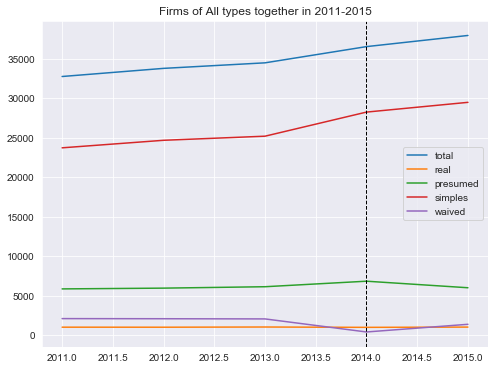

In [9]:
plt.figure(figsize = (8,6))
labels = ['total', 'real', 'presumed', 'simples', 'waived']
[plt.plot(np.arange(2011,2016,1), means[i], label = labels[i]) for i in np.arange(5)]
plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.title("Firms of All types together in 2011-2015")
plt.legend()
plt.show()

## Some deeper analysis

In [10]:
# %change from 2013 to 2014 for all firms

percent_change_simples = 100*(firms["firms_simples_14"] - firms["firms_simples_13"])/firms["firms_simples_13"]

In [11]:
np.mean(percent_change_simples), np.std(percent_change_simples)

(20.107178490225248, 65.51515158551697)

In [12]:
firms_copy = firms

In [13]:
firms_copy["SIMPLES Change"] = percent_change_simples

In [14]:
# these firms have no change as a result of simples
no_change = firms_copy[firms_copy['SIMPLES Change']==0]
no_change

,sheet,firms_real_11,firms_real_12,firms_real_13,firms_real_14,firms_real_15,firms_presumed_11,firms_presumed_12,firms_presumed_13,firms_presumed_14,...,firms_waived_12,firms_waived_13,firms_waived_14,firms_waived_15,firms_total_11,firms_total_12,firms_total_13,firms_total_14,firms_total_15,SIMPLES Change
61,184,30,30,30,29,31,68,78,79,76,...,0,0,0,0,240,258,241,237,247,0.0
70,210,42,44,44,52,47,14,12,14,15,...,0,0,0,0,62,62,64,73,63,0.0
244,720,4,3,3,2,2,60,65,60,70,...,1,0,0,0,66,73,69,78,83,0.0


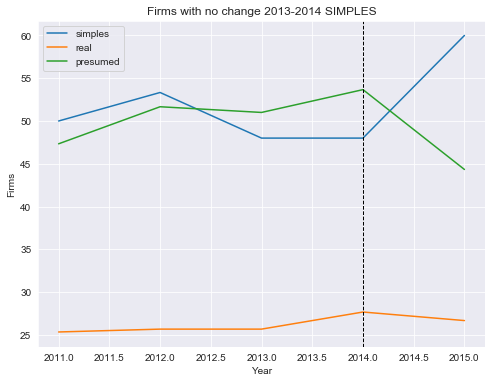

In [15]:
plt.figure(figsize = (8,6))
plt.plot(np.arange(2011,2016,1), np.mean(no_change[simples]), label = 'simples')
plt.plot(np.arange(2011,2016,1), np.mean(no_change[real]), label = 'real')
plt.plot(np.arange(2011,2016,1), np.mean(no_change[presumed]), label = 'presumed')
plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.legend()
plt.title("Firms with no change 2013-2014 SIMPLES")
plt.xlabel("Year")
plt.ylabel("Firms")
plt.show()

In [16]:
positive_change = firms_copy[firms_copy['SIMPLES Change']>0]
positive_change.head()

,sheet,firms_real_11,firms_real_12,firms_real_13,firms_real_14,firms_real_15,firms_presumed_11,firms_presumed_12,firms_presumed_13,firms_presumed_14,...,firms_waived_12,firms_waived_13,firms_waived_14,firms_waived_15,firms_total_11,firms_total_12,firms_total_13,firms_total_14,firms_total_15,SIMPLES Change
0,1,147500,146779,150531,144307,149210,839544,853367,878787,978776,...,300192,296852,60724,199560,4679612,4826589,4926744,5219958,5421516,12.097432
1,4,567,545,542,543,576,1392,1553,1727,2168,...,123,114,122,168,2671,2855,3029,3618,3902,21.517028
2,7,39,36,45,42,44,150,164,175,148,...,42,48,16,24,1133,1139,1216,1297,1307,15.084388
3,10,368,357,362,320,328,599,659,697,728,...,50,55,15,30,1560,1648,1737,1804,1894,18.940610
4,13,54,53,58,56,61,158,166,175,176,...,2,1,2,4,423,449,479,525,558,18.775510


In [17]:
len(positive_change)

215

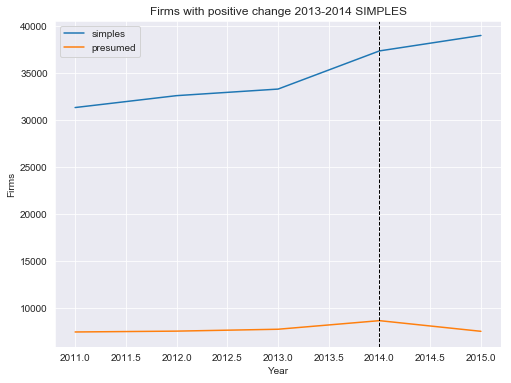

In [18]:
plt.figure(figsize = (8,6))
plt.plot(np.arange(2011,2016,1), np.mean(positive_change[simples]), label = 'simples')
plt.plot(np.arange(2011,2016,1), np.mean(positive_change[presumed]), label = 'presumed')
plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)

plt.legend()
plt.title("Firms with positive change 2013-2014 SIMPLES")
plt.xlabel("Year")
plt.ylabel("Firms")
plt.show()

In [19]:
negative_change = firms_copy[firms_copy['SIMPLES Change']<0]
negative_change.head()

,sheet,firms_real_11,firms_real_12,firms_real_13,firms_real_14,firms_real_15,firms_presumed_11,firms_presumed_12,firms_presumed_13,firms_presumed_14,...,firms_waived_12,firms_waived_13,firms_waived_14,firms_waived_15,firms_total_11,firms_total_12,firms_total_13,firms_total_14,firms_total_15,SIMPLES Change
7,22,0,0,0,0,0,0,1,0,1,...,0,0,0,0,2,3,6,5,6,-33.333333
13,40,16,16,15,15,15,24,16,17,19,...,0,0,0,1,66,55,53,54,54,-4.761905
14,43,106,107,117,114,113,22,27,26,28,...,0,0,0,0,151,157,163,159,159,-15.000000
15,46,74,79,73,62,67,96,104,115,88,...,1,1,0,0,199,213,212,172,182,-4.347826
24,73,106,115,114,106,109,112,114,115,98,...,2,2,0,1,344,370,373,333,329,-9.154930


In [20]:
len(negative_change)

54

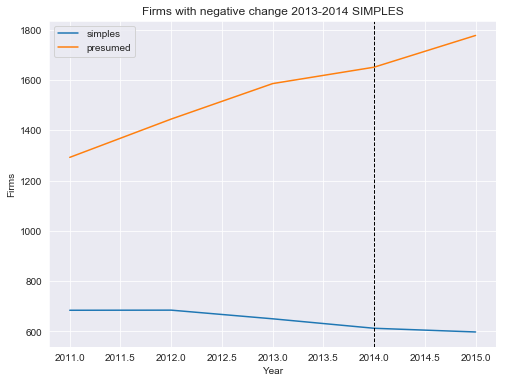

In [21]:
plt.figure(figsize = (8,6))
plt.plot(np.arange(2011,2016,1), np.mean(negative_change[simples]), label = 'simples')
plt.plot(np.arange(2011,2016,1), np.mean(negative_change[presumed]), label = 'presumed')
plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)

plt.legend()
plt.title("Firms with negative change 2013-2014 SIMPLES")
plt.xlabel("Year")
plt.ylabel("Firms")
plt.show()

Next steps:
which firms are moving from which tier to tier?
* maybe have a graph of moving from any tier to any other tier, similar to the group 1-9 thing in DC project

what is happening to revenue as they move?

# Now let's analyze revenue

## Some data cleaning here

In [22]:
revenue_old = pd.read_excel("revenue.xlsx")

In [23]:
len(revenue_old)

285

In [24]:
len(firms)

286

In [25]:
# this is the sheet where these two go wrong
[firms['sheet'][i] for i in np.arange(285) if revenue_old["sheet"][i] != firms['sheet'][i]][0]

447

In [26]:
revenue_old['sheet'][151]

449

In [27]:
firms['sheet'][151]

447

**NOTE: There is no sheet 447 in revenue excel file. sheet 447 is sector 46.6. Fixed in excel and reupload.**

In [28]:
revenue = pd.read_excel("revenue_final.xlsx")

In [29]:
# NOW THE SHEET NUMBERS on REVENUE and FIRMS is exactly the same!!!
[firms['sheet'][i] for i in np.arange(285) if revenue["sheet"][i] != firms['sheet'][i]]

[]

In [30]:
revenue.head()

,sheet,revenue_real_11,revenue_real_12,revenue_real_13,revenue_real_14,revenue_real_15,revenue_presumed_11,revenue_presumed_12,revenue_presumed_13,revenue_presumed_14,...,revenue_waived_11,revenue_waived_12,revenue_waived_13,revenue_waived_14,revenue_waived_15,revenue_total_11,revenue_total_12,revenue_total_13,revenue_total_14,revenue_total_15
0,1,6516168,6969988,7826057,9153270.0,10902635.0,1049764,965187,1064501,1191023.0,...,281554.0,327842,325522,176227.0,208844.0,8453736.0,8995318.0,10048156.0,11333855.0,13131615.0
1,4,14410,15146,15838,17060.0,21609.0,2101,2612,2912,3335.0,...,16.0,16,23,5.0,0.0,16637.0,17886.0,18904.0,20531.0,25576.0
2,7,196,204,296,317.0,293.0,97,142,186,202.0,...,1.0,0,2,2.0,0.0,418.0,506.0,669.0,703.0,712.0
3,10,3070,3550,3509,3674.0,4253.0,618,775,913,1188.0,...,9.0,8,5,0.0,0.0,3763.0,4417.0,4522.0,4957.0,5793.0
4,13,1103,1273,2071,2886.0,3496.0,566,721,670,706.0,...,0.0,0,0,0.0,0.0,1716.0,2030.0,2786.0,3632.0,4284.0


In [31]:
revenue_real = ["revenue_real_11", "revenue_real_12", "revenue_real_13", "revenue_real_14", "revenue_real_15"]
revenue_presumed = ["revenue_presumed_11", "revenue_presumed_12", "revenue_presumed_13",
                    "revenue_presumed_14", "revenue_presumed_15"]
revenue_simples = ["revenue_simples_11", "revenue_simples_12", "revenue_simples_13", 
                   "revenue_simples_14", "revenue_simples_15"]
revenue_waived = ["revenue_waived_11", "revenue_waived_12", "revenue_waived_13", 
                  "revenue_waived_14", "revenue_waived_15"]
revenue_total = ["revenue_total_11", "revenue_total_12", "revenue_total_13", "revenue_total_14", "revenue_total_15"]

In [32]:
revenue_means = (np.mean(revenue[revenue_total]), np.mean(revenue[revenue_real]), np.mean(revenue[revenue_presumed]), 
         np.mean(revenue[revenue_simples]), np.mean(revenue[revenue_waived]))

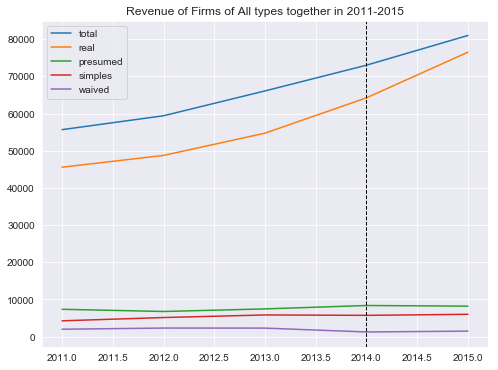

In [33]:
plt.figure(figsize = (8,6))
labels = ['total', 'real', 'presumed', 'simples', 'waived']
[plt.plot(np.arange(2011,2016,1), revenue_means[i], label = labels[i]) for i in np.arange(5)]
plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.title("Revenue of Firms of All types together in 2011-2015")
plt.legend()
plt.show()

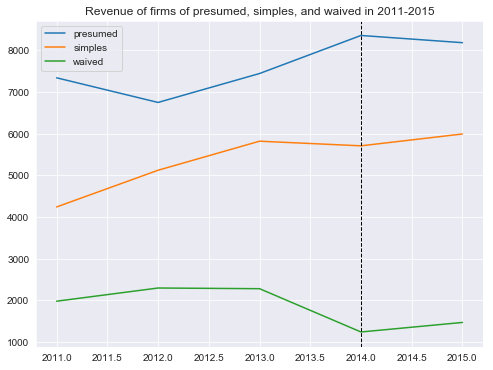

In [34]:
plt.figure(figsize = (8,6))
labels = ['total', 'real', 'presumed', 'simples', 'waived']
[plt.plot(np.arange(2011,2016,1), revenue_means[i], label = labels[i]) for i in np.arange(2,5)]
plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.title("Revenue of firms of presumed, simples, and waived in 2011-2015")
plt.legend()
plt.show()

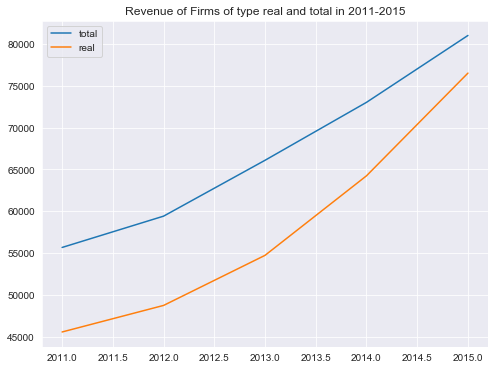

In [35]:
plt.figure(figsize = (8,6))
labels = ['total', 'real', 'presumed', 'simples', 'waived']
[plt.plot(np.arange(2011,2016,1), revenue_means[i], label = labels[i]) for i in np.arange(0,2)]
plt.title("Revenue of Firms of type real and total in 2011-2015")
plt.legend()
plt.show()

# can i do a heat map or a correlation plot in sns.jointgrid between revenue and firm entry?
# Also can do a sns.distplot for control vs treatment group maybe.

DID THIS WORK from DROPBOX?

how to do correlation coefficient in python jupyter notebook
https://raphaelvallat.com/correlation.html

In [36]:
rev_firms = pd.merge(firms, revenue, on = "sheet", how = "outer")

In [37]:
rev_firms.head()

,sheet,firms_real_11,firms_real_12,firms_real_13,firms_real_14,firms_real_15,firms_presumed_11,firms_presumed_12,firms_presumed_13,firms_presumed_14,...,revenue_waived_11,revenue_waived_12,revenue_waived_13,revenue_waived_14,revenue_waived_15,revenue_total_11,revenue_total_12,revenue_total_13,revenue_total_14,revenue_total_15
0,1,147500,146779,150531,144307,149210,839544,853367,878787,978776,...,281554.0,327842,325522,176227.0,208844.0,8453736.0,8995318.0,10048156.0,11333855.0,13131615.0
1,4,567,545,542,543,576,1392,1553,1727,2168,...,16.0,16,23,5.0,0.0,16637.0,17886.0,18904.0,20531.0,25576.0
2,7,39,36,45,42,44,150,164,175,148,...,1.0,0,2,2.0,0.0,418.0,506.0,669.0,703.0,712.0
3,10,368,357,362,320,328,599,659,697,728,...,9.0,8,5,0.0,0.0,3763.0,4417.0,4522.0,4957.0,5793.0
4,13,54,53,58,56,61,158,166,175,176,...,0.0,0,0,0.0,0.0,1716.0,2030.0,2786.0,3632.0,4284.0


In [38]:
std_units = rev_firms.copy()

In [39]:
std_units = (std_units - np.mean(std_units)) / np.std(std_units)

In [40]:
# removed the todos row (aka first row)
std_units = std_units.drop(0, axis = 0)

In [41]:
std_units.head()

,sheet,firms_real_11,firms_real_12,firms_real_13,firms_real_14,firms_real_15,firms_presumed_11,firms_presumed_12,firms_presumed_13,firms_presumed_14,...,revenue_waived_11,revenue_waived_12,revenue_waived_13,revenue_waived_14,revenue_waived_15,revenue_total_11,revenue_total_12,revenue_total_13,revenue_total_14,revenue_total_15
1,-1.722254,-0.052860,-0.055033,-0.056897,-0.054154,-0.052507,-0.089630,-0.086850,-0.084385,-0.080085,...,-0.097436,-0.097758,-0.098479,-0.113450,-0.113585,-0.077825,-0.077810,-0.079158,-0.078068,-0.071195
2,-1.709876,-0.112950,-0.113219,-0.112271,-0.112358,-0.112268,-0.114485,-0.114176,-0.114026,-0.114677,...,-0.098181,-0.098445,-0.099397,-0.113726,-0.113585,-0.110163,-0.110375,-0.109749,-0.107562,-0.103128
3,-1.697499,-0.075508,-0.076524,-0.076952,-0.080061,-0.080366,-0.105499,-0.104438,-0.104056,-0.104745,...,-0.097784,-0.098101,-0.099266,-0.113910,-0.113585,-0.103494,-0.103047,-0.103285,-0.101234,-0.096602
4,-1.685122,-0.111243,-0.111275,-0.110823,-0.110731,-0.110359,-0.114325,-0.114137,-0.114026,-0.114198,...,-0.098231,-0.098445,-0.099484,-0.113910,-0.113585,-0.107575,-0.107520,-0.106197,-0.103205,-0.098540
5,-1.672744,-0.008816,-0.009880,-0.016230,-0.023484,-0.026895,-0.067197,-0.064659,-0.063262,-0.066762,...,-0.097933,-0.098316,-0.099178,-0.113358,-0.113120,-0.089055,-0.090459,-0.089931,-0.086793,-0.085287


In [42]:
std_units[['firms_total_11', "revenue_total_11"]].corr()

,firms_total_11,revenue_total_11
firms_total_11,1.000000,0.415918
revenue_total_11,0.415918,1.000000


In [43]:
std_units = std_units.drop(['SIMPLES Change'], axis = 1)

## Correlation Heat Maps

In [44]:
std_units_total = std_units[['firms_total_11', 'firms_total_12',
                             "firms_total_13", "firms_total_14", "firms_total_15",
                            "revenue_total_11", "revenue_total_12", "revenue_total_13", "revenue_total_14",
                             "revenue_total_15"]]

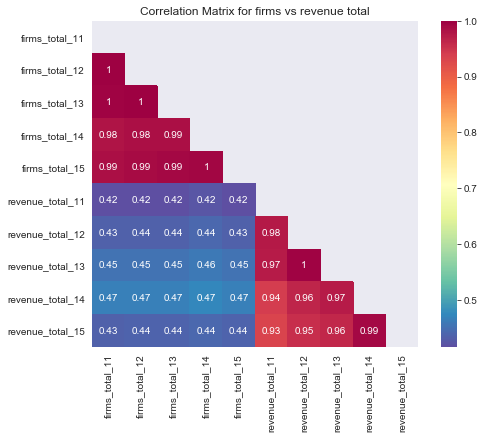

In [45]:
plt.figure(figsize = (8,6))
corrs = std_units_total.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, annot = True)
plt.title('Correlation Matrix for firms vs revenue total')
plt.show()

In [46]:
std_units_simples = std_units[['firms_simples_11', 'firms_simples_12',
                             "firms_simples_13", "firms_simples_14", "firms_simples_15",
                            "revenue_simples_11", "revenue_simples_12", "revenue_simples_13", "revenue_simples_14",
                             "revenue_simples_15"]]

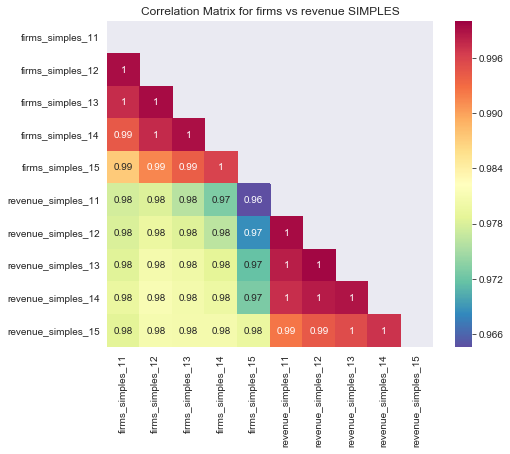

In [47]:
plt.figure(figsize = (8,6))
corrs = std_units_simples.corr()

sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, annot = True)
plt.title('Correlation Matrix for firms vs revenue SIMPLES')
plt.show()

In [48]:
std_units_presumed = std_units[['firms_presumed_11', 'firms_presumed_12',
                             "firms_presumed_13", "firms_presumed_14", "firms_presumed_15",
                            "revenue_presumed_11", "revenue_presumed_12", "revenue_presumed_13", "revenue_presumed_14",
                             "revenue_presumed_15"]]

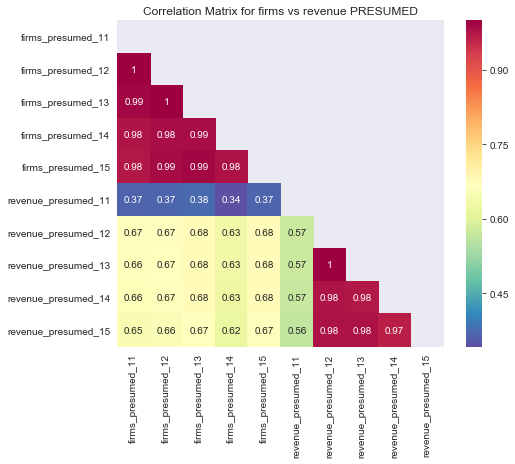

In [49]:
plt.figure(figsize = (8,6))
corrs = std_units_presumed.corr()

sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, annot = True)
plt.title('Correlation Matrix for firms vs revenue PRESUMED')
plt.show()

In [50]:
std_units_waived = std_units[['firms_waived_11', 'firms_waived_12',
                             "firms_waived_13", "firms_waived_14", "firms_waived_15",
                            "revenue_waived_11", "revenue_waived_12", "revenue_waived_13", "revenue_waived_14",
                             "revenue_waived_15"]]

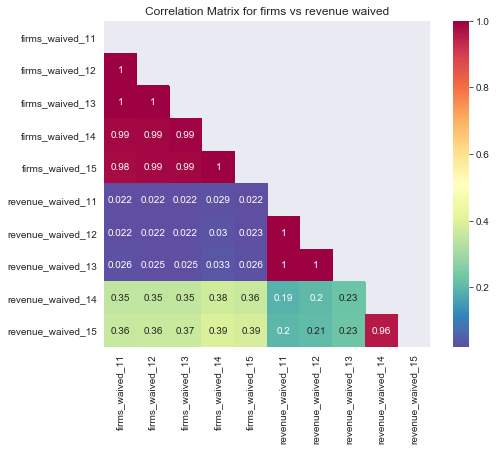

In [51]:
plt.figure(figsize = (8,6))
corrs = std_units_waived.corr()

sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, annot = True)
plt.title('Correlation Matrix for firms vs revenue waived')
plt.show()

**Total Revenue on Total Firm Entry in 2014:**

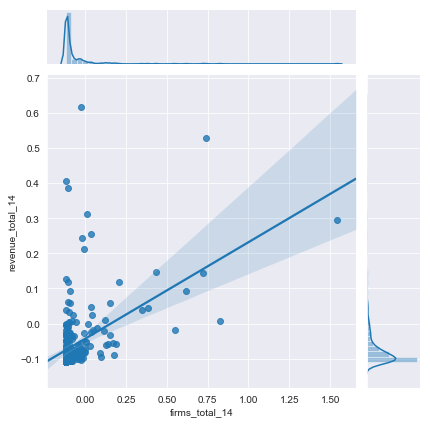

In [52]:
g = sns.JointGrid(x= 'firms_total_14', y="revenue_total_14", data = std_units)
g = g.plot(sns.regplot, sns.distplot)

**SIMPLES Revenue on SIMPLES Firms in 2014:**

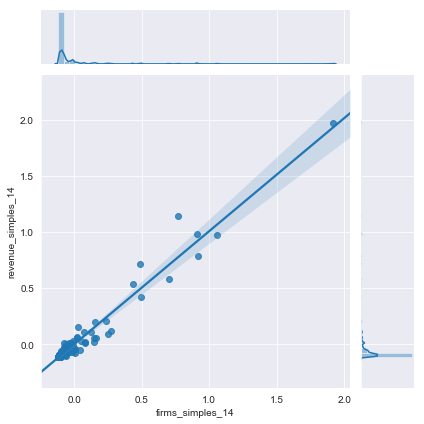

In [53]:
# plot of revenue of firms and numbers of firms in simples in 2014
g = sns.JointGrid(x= 'firms_simples_14', y="revenue_simples_14", data = std_units)
g = g.plot(sns.regplot, sns.distplot)

**Presumed Revenue vs. Firms Presumed in 2014:**

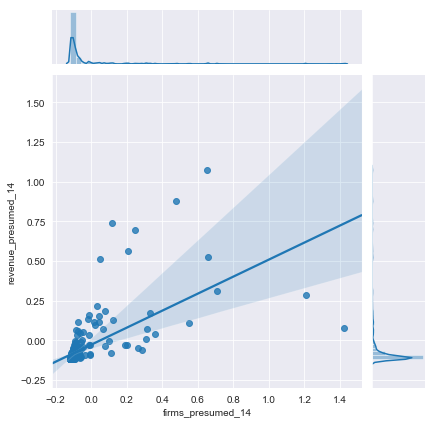

In [54]:
g = sns.jointplot(x= 'firms_presumed_14', y="revenue_presumed_14", kind = 'reg', data = std_units)


In [55]:
rev_firms_no_total = rev_firms.drop(0, axis = 0)

In [56]:
rev_firms_no_total = rev_firms_no_total.drop(['SIMPLES Change'], axis = 1)

In [57]:
rev_firms_no_total.head()

,sheet,firms_real_11,firms_real_12,firms_real_13,firms_real_14,firms_real_15,firms_presumed_11,firms_presumed_12,firms_presumed_13,firms_presumed_14,...,revenue_waived_11,revenue_waived_12,revenue_waived_13,revenue_waived_14,revenue_waived_15,revenue_total_11,revenue_total_12,revenue_total_13,revenue_total_14,revenue_total_15
1,4,567,545,542,543,576,1392,1553,1727,2168,...,16.0,16,23,5.0,0.0,16637.0,17886.0,18904.0,20531.0,25576.0
2,7,39,36,45,42,44,150,164,175,148,...,1.0,0,2,2.0,0.0,418.0,506.0,669.0,703.0,712.0
3,10,368,357,362,320,328,599,659,697,728,...,9.0,8,5,0.0,0.0,3763.0,4417.0,4522.0,4957.0,5793.0
4,13,54,53,58,56,61,158,166,175,176,...,0.0,0,0,0.0,0.0,1716.0,2030.0,2786.0,3632.0,4284.0
5,16,954,940,907,807,804,2513,2681,2833,2946,...,6.0,3,7,6.0,6.0,11005.0,11135.0,12482.0,14665.0,14603.0


\newpage

# Start 8/12/20 - Treatment Analysis 
## START HERE

In [58]:
dados_treated = pd.read_excel("dados_treated.xlsx")

In [59]:
dados_treated = dados_treated[['treated14']]

In [60]:
dados_treated.head()

,treated14
0,0
1,0
2,0
3,0
4,0


In [61]:
dados_treated.index = np.arange(1, len(dados_treated)+1)

In [62]:
dados_treated.tail()

,treated14
281,0
282,0
283,0
284,1
285,1


In [63]:
#mergedDf = empDfObj.merge(salaryDfObj, left_index=True, right_index=True)
merge_treated = dados_treated.merge(rev_firms_no_total, left_index = True, right_index = True)

In [64]:
len(merge_treated[merge_treated['treated14']==0])

238

In [65]:
len(merge_treated[merge_treated['treated14']==1])

47

**Note: There are 238 untreated sectors and 47 treated sectors**

In [66]:
not_treated = merge_treated[merge_treated['treated14']==0]

In [67]:
treated = merge_treated[merge_treated['treated14']==1]

In [68]:
len(treated)

47

In [69]:
treated.head()

,treated14,sheet,firms_real_11,firms_real_12,firms_real_13,firms_real_14,firms_real_15,firms_presumed_11,firms_presumed_12,firms_presumed_13,...,revenue_waived_11,revenue_waived_12,revenue_waived_13,revenue_waived_14,revenue_waived_15,revenue_total_11,revenue_total_12,revenue_total_13,revenue_total_14,revenue_total_15
19,1,58,114,120,130,135,144,116,135,115,...,0.0,0,0,0.0,0.0,22584.0,19010.0,16824.0,17944.0,24923.0
30,1,91,179,185,200,206,215,1122,1076,1006,...,2.0,0,0,0.0,0.0,45436.0,46927.0,48739.0,64625.0,79497.0
31,1,94,227,233,237,233,227,346,351,343,...,0.0,0,0,0.0,0.0,27149.0,28183.0,30975.0,32011.0,34670.0
33,1,100,24,23,19,30,29,45,44,42,...,0.0,0,0,0.0,0.0,11084.0,11897.0,12125.0,18165.0,17049.0
64,1,192,475,488,488,481,497,757,759,734,...,0.0,0,0,0.0,0.0,36069.0,42830.0,47595.0,52384.0,59719.0


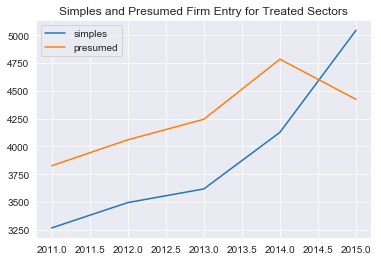

In [70]:
plt.plot(np.arange(2011,2016,1), np.mean(treated[simples]), label = 'simples')
plt.plot(np.arange(2011,2016,1), np.mean(treated[presumed]), label = 'presumed')
plt.legend()
plt.title("Simples and Presumed Firm Entry for Treated Sectors")
plt.show()

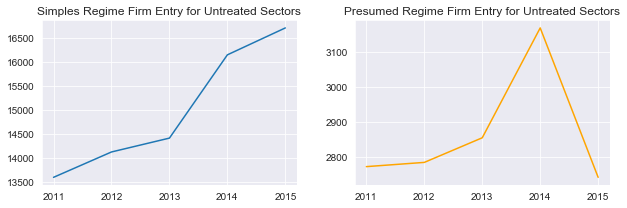

In [71]:
plt.figure(figsize = (9,3))
plt.subplot(1, 2, 1)
plt.plot(np.arange(2011,2016,1), np.mean(not_treated[simples]), label = 'simples')
plt.title("Simples Regime Firm Entry for Untreated Sectors")
plt.subplot(1, 2, 2)

plt.plot(np.arange(2011,2016,1), np.mean(not_treated[presumed]), label = 'presumed', color = 'orange')
plt.title("Presumed Regime Firm Entry for Untreated Sectors")
plt.tight_layout()
plt.show()

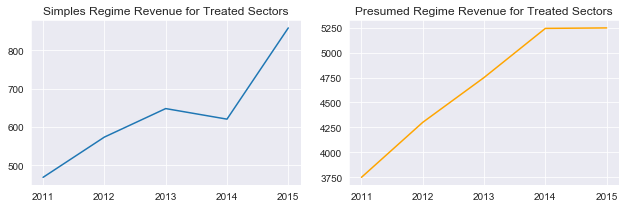

In [72]:
plt.figure(figsize = (9,3))
plt.subplot(1, 2, 1)
plt.plot(np.arange(2011,2016,1), np.mean(treated[revenue_simples]), label = 'simples')
plt.title("Simples Regime Revenue for Treated Sectors")
plt.subplot(1, 2, 2)

plt.plot(np.arange(2011,2016,1), np.mean(treated[revenue_presumed]), label = 'presumed', color = 'orange')
plt.title("Presumed Regime Revenue for Treated Sectors")
plt.tight_layout()
plt.show()

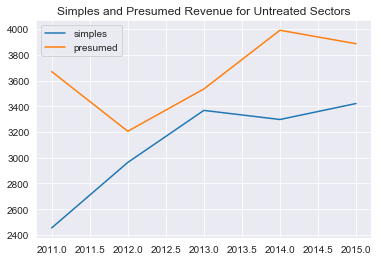

In [73]:
plt.plot(np.arange(2011,2016,1), np.mean(not_treated[revenue_simples]), label = 'simples')
plt.plot(np.arange(2011,2016,1), np.mean(not_treated[revenue_presumed]), label = 'presumed')
plt.legend()
plt.title("Simples and Presumed Revenue for Untreated Sectors")
plt.show()

In [74]:
treat_simples = np.sum(treated[simples])

In [75]:
treat_presumed = np.sum(treated[presumed])

In [76]:
treat_waived = np.sum(treated[waived])

In [77]:
treat_real = np.sum(treated[real])

In [78]:
treat_total = np.sum(treated[total])

In [79]:
frac_simples_treated = [treat_simples[i]/treat_total[i] for i in np.arange(5)]

In [80]:
frac_presumed_treated = [treat_presumed[i]/treat_total[i] for i in np.arange(5)]

In [81]:
frac_waived_treated = [treat_waived[i]/treat_total[i] for i in np.arange(5)]

In [82]:
frac_real_treated = [treat_real[i]/treat_total[i] for i in np.arange(5)]

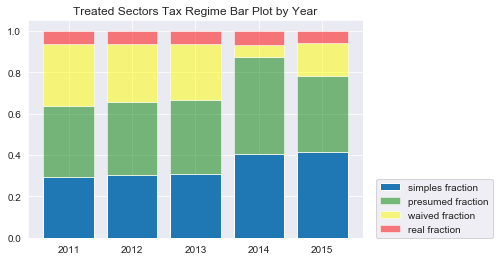

In [83]:
plt.bar(np.arange(2011,2016,1), frac_simples_treated , label = 'simples fraction')
plt.bar(np.arange(2011,2016,1), frac_presumed_treated , label = 'presumed fraction', color = 'green', alpha = 0.5, 
       bottom = frac_simples_treated)
plt.bar(np.arange(2011,2016,1), frac_waived_treated , label = 'waived fraction', color = 'yellow', alpha = 0.5, 
       bottom = np.array(frac_simples_treated)+ np.array(frac_presumed_treated))
plt.bar(np.arange(2011,2016,1), frac_real_treated , label = 'real fraction', color = 'red', alpha = 0.5, 
       bottom = np.array(frac_simples_treated) + np.array(frac_presumed_treated) + np.array(frac_waived_treated))
plt.legend(loc=(1.04,0))

plt.title("Treated Sectors Tax Regime Bar Plot by Year")
plt.show()

In [84]:
control_simples = np.sum(not_treated[simples])
control_presumed = np.sum(not_treated[presumed])
control_waived = np.sum(not_treated[waived])
control_real = np.sum(not_treated[real])
control_total = np.sum(not_treated[total])

In [85]:
frac_simples_control = [control_simples[i]/control_total[i] for i in np.arange(5)]
frac_presumed_control = [control_presumed[i]/control_total[i] for i in np.arange(5)]
frac_waived_control = [control_waived[i]/control_total[i] for i in np.arange(5)]
frac_real_control = [control_real[i]/control_total[i] for i in np.arange(5)]

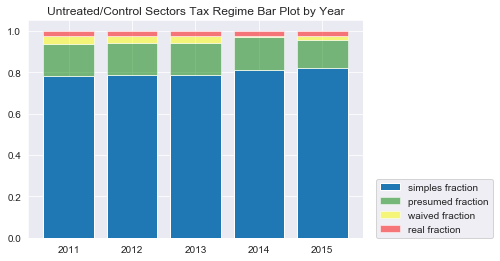

In [86]:
plt.bar(np.arange(2011,2016,1), frac_simples_control , label = 'simples fraction')
plt.bar(np.arange(2011,2016,1), frac_presumed_control , label = 'presumed fraction', color = 'green', alpha = 0.5, 
       bottom = frac_simples_control)
plt.bar(np.arange(2011,2016,1), frac_waived_control , label = 'waived fraction', color = 'yellow', alpha = 0.5, 
       bottom = np.array(frac_simples_control)+ np.array(frac_presumed_control))
plt.bar(np.arange(2011,2016,1), frac_real_control , label = 'real fraction', color = 'red', alpha = 0.5, 
       bottom = np.array(frac_simples_control) + np.array(frac_presumed_control) + np.array(frac_waived_control))
plt.legend(loc=(1.04,0))

plt.title("Untreated/Control Sectors Tax Regime Bar Plot by Year")
plt.show()

In [87]:
treat_simples = np.sum(treated[revenue_simples])
treat_presumed = np.sum(treated[revenue_presumed])
treat_waived = np.sum(treated[revenue_waived])
treat_real = np.sum(treated[revenue_real])
treat_total = np.sum(treated[revenue_total])

In [88]:
frac_simples_treated = [treat_simples[i]/treat_total[i] for i in np.arange(5)]
frac_presumed_treated = [treat_presumed[i]/treat_total[i] for i in np.arange(5)]
frac_waived_treated = [treat_waived[i]/treat_total[i] for i in np.arange(5)]
frac_real_treated = [treat_real[i]/treat_total[i] for i in np.arange(5)]

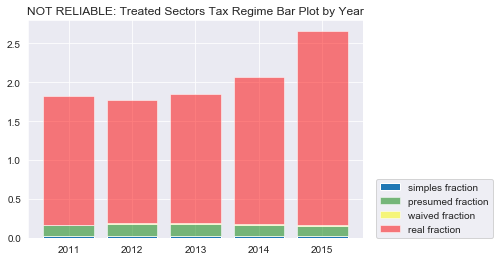

In [89]:
plt.bar(np.arange(2011,2016,1), frac_simples_treated , label = 'simples fraction')
plt.bar(np.arange(2011,2016,1), frac_presumed_treated , label = 'presumed fraction', color = 'green', alpha = 0.5, 
       bottom = frac_simples_treated)
plt.bar(np.arange(2011,2016,1), frac_waived_treated , label = 'waived fraction', color = 'yellow', alpha = 0.5, 
       bottom = np.array(frac_simples_treated)+ np.array(frac_presumed_treated))
plt.bar(np.arange(2011,2016,1), frac_real_treated , label = 'real fraction', color = 'red', alpha = 0.5, 
       bottom = np.array(frac_simples_treated) + np.array(frac_presumed_treated) + np.array(frac_waived_treated))
plt.legend(loc=(1.04,0))

plt.title("NOT RELIABLE: Treated Sectors Tax Regime Bar Plot by Year")
plt.show()

In [90]:
# these are all the sectors where the real revenue is larger than the total revenue!!!

merge_treated[merge_treated['revenue_real_14']> merge_treated['revenue_total_14']][['sheet','revenue_real_11',
                'revenue_real_12', 'revenue_real_13', 'revenue_real_14', 'revenue_real_15',
                'revenue_total_11', 'revenue_total_12', "revenue_total_13", 'revenue_total_14',
                                                                 'revenue_total_15']]


,sheet,revenue_real_11,revenue_real_12,revenue_real_13,revenue_real_14,revenue_real_15,revenue_total_11,revenue_total_12,revenue_total_13,revenue_total_14,revenue_total_15
125,371,15954,19763,24185,29156.0,30568.0,53.0,54.0,52.0,60.0,64.0
126,374,96,90,111,101.0,179.0,23.0,20.0,29.0,29.0,31.0
129,383,6366,7880,8937,9787.0,10373.0,3380.0,3882.0,4285.0,5072.0,5188.0
130,386,1775,2031,2109,1846.0,2924.0,242.0,268.0,274.0,292.0,316.0
132,392,125,146,185,189.0,172.0,56.0,62.0,76.0,95.0,108.0
202,595,872210,861362,1031016,1534419.0,2626121.0,1504.0,1464.0,1416.0,1312.0,1329.0
203,598,138052,149715,166405,259496.0,473231.0,280.0,280.0,275.0,292.0,282.0
210,619,1521,389,2624,3438.0,4010.0,23.0,23.0,25.0,45.0,33.0
213,628,58313,65376,73117,83070.0,98923.0,1051.0,1029.0,1028.0,966.0,1027.0
228,672,1492,1864,1879,2104.0,2143.0,1196.0,1223.0,1166.0,1291.0,1434.0


**Note: There must be mistakes in the real revenue data, since some real revenue is higher than total revenue!**

In [91]:
merge_treated[merge_treated['revenue_total_11']== merge_treated['firms_total_11']][['sheet','revenue_real_11',
                'revenue_real_12', 'revenue_real_13', 'revenue_real_14', 'revenue_real_15',
                'revenue_total_11', 'revenue_total_12', "revenue_total_13", 'revenue_total_14',
                                                                 'revenue_total_15']]


,sheet,revenue_real_11,revenue_real_12,revenue_real_13,revenue_real_14,revenue_real_15,revenue_total_11,revenue_total_12,revenue_total_13,revenue_total_14,revenue_total_15
113,336,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,371,15954,19763,24185,29156.0,30568.0,53.0,54.0,52.0,60.0,64.0
126,374,96,90,111,101.0,179.0,23.0,20.0,29.0,29.0,31.0
129,383,6366,7880,8937,9787.0,10373.0,3380.0,3882.0,4285.0,5072.0,5188.0
130,386,1775,2031,2109,1846.0,2924.0,242.0,268.0,274.0,292.0,316.0
131,389,2688,2893,2952,3512.0,3804.0,3363.0,3533.0,3537.0,4007.0,3945.0
132,392,125,146,185,189.0,172.0,56.0,62.0,76.0,95.0,108.0
163,478,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,493,10,1,1,4.0,3.0,28.0,26.0,27.0,31.0,31.0
183,538,8471,9674,10507,13196.0,13659.0,28614.0,29831.0,30709.0,37200.0,36072.0


In [92]:
sum_to_total = merge_treated['revenue_real_11'] + merge_treated['revenue_presumed_11']
sum_to_total = sum_to_total + merge_treated['revenue_simples_11'] + merge_treated['revenue_waived_11']

In [93]:
test1 = merge_treated[merge_treated['revenue_total_11'] != sum_to_total][['sheet','revenue_real_11',
                'revenue_presumed_11', 'revenue_simples_11', 'revenue_waived_11', 'revenue_total_11']]

In [94]:
sum_to_total_2 = test1['revenue_real_11'] + test1['revenue_presumed_11']
sum_to_total_2 = sum_to_total_2 + test1['revenue_simples_11'] + test1['revenue_waived_11']

**These are the sheets where the revenue_total_11 doesn't add up and is not within +/- 1**

In [95]:
test1[(test1['revenue_total_11'] != sum_to_total_2+1) & (test1['revenue_total_11'] != sum_to_total_2-1)]

,sheet,revenue_real_11,revenue_presumed_11,revenue_simples_11,revenue_waived_11,revenue_total_11
125,371,15954,8,2,0.0,53.0
126,374,96,21,2,0.0,23.0
129,383,6366,1009,524,3.0,3380.0
130,386,1775,539,15,21.0,242.0
131,389,2688,1140,671,1.0,3363.0
132,392,125,33,1,0.0,56.0
168,493,10,2,1,0.0,28.0
183,538,8471,1822,5434,6.0,28614.0
200,589,309,236,457,2.0,NaN
201,592,0,0,0,NaN,0.0


In [96]:
control_simples = np.sum(not_treated[revenue_simples])
control_presumed = np.sum(not_treated[revenue_presumed])
control_waived = np.sum(not_treated[revenue_waived])
control_real = np.sum(not_treated[revenue_real])
control_total = np.sum(not_treated[revenue_total])

In [97]:
frac_simples_control = [control_simples[i]/control_total[i] for i in np.arange(5)]
frac_presumed_control = [control_presumed[i]/control_total[i] for i in np.arange(5)]
frac_waived_control = [control_waived[i]/control_total[i] for i in np.arange(5)]
frac_real_control = [control_real[i]/control_total[i] for i in np.arange(5)]

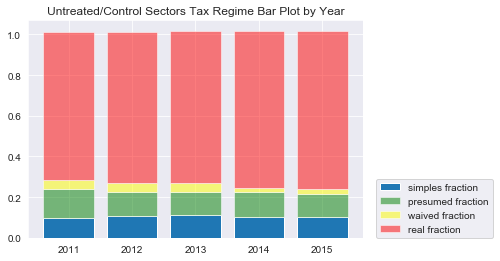

In [98]:
plt.bar(np.arange(2011,2016,1), frac_simples_control , label = 'simples fraction')
plt.bar(np.arange(2011,2016,1), frac_presumed_control , label = 'presumed fraction', color = 'green', alpha = 0.5, 
       bottom = frac_simples_control)
plt.bar(np.arange(2011,2016,1), frac_waived_control , label = 'waived fraction', color = 'yellow', alpha = 0.5, 
       bottom = np.array(frac_simples_control)+ np.array(frac_presumed_control))
plt.bar(np.arange(2011,2016,1), frac_real_control , label = 'real fraction', color = 'red', alpha = 0.5, 
       bottom = np.array(frac_simples_control) + np.array(frac_presumed_control) + np.array(frac_waived_control))
plt.legend(loc=(1.04,0))

plt.title("Untreated/Control Sectors Tax Regime Bar Plot by Year")
plt.show()

# 8/17 - Treated Sectors Imposed by Law

In [99]:
treated_sectors = pd.read_excel("treated_sectors_cnae.xlsx")

In [100]:
treated_sectors['CNAE'] = [treated_sectors["CNAE"][i][0:3] for i in np.arange(len(treated_sectors))]

In [101]:
treated_sectors = treated_sectors.astype(str)

In [102]:
treated_sectors["CNAE"] = [treated_sectors["CNAE"][i][:2]+ '.'+ treated_sectors["CNAE"][i][2:] for i in np.arange(len(treated_sectors))]

In [103]:
treated_sectors = treated_sectors[treated_sectors['included'] =='1']

In [104]:
# unique sectors where reform happened
unique_treated_sectors = treated_sectors['CNAE'].unique()

In [105]:
unique_treated_sectors

array(['09.1', '11.1', '11.2', '12.2', '20.9', '25.5', '29.1', '30.9',
       '35.1', '36.0', '37.0', '38.2', '39.0', '41.1', '46.3', '49.1',
       '49.2', '50.1', '53.1', '60.2', '62.0', '64.1', '64.2', '64.3',
       '64.4', '64.5', '64.6', '64.7', '64.9', '65.1', '65.2', '65.3',
       '65.4', '66.1', '68.1', '69.1', '78.2', '78.3', '81.1', '84.1',
       '84.2', '84.3', '85.5', '94.1', '94.2', '94.3', '94.9', '99.0'],
      dtype=object)

In [106]:
len(unique_treated_sectors)

48

In [107]:
sector_sheet = pd.read_excel('Sector_Sheet_Final.xlsx')

In [108]:
sector_sheet.head()

,Sheet Number,sector
0,1,Todos
1,2,Todos
2,3,Todos
3,4,01.1
4,5,01.1


In [109]:
sector_sheet = sector_sheet.astype(str)

In [110]:
firms[['sheet']].head()

,sheet
0,1
1,4
2,7
3,10
4,13


In [111]:
sector_sheet['Sheet Number'] = sector_sheet['Sheet Number'].astype(str)

In [112]:
firms['sheet'] = firms['sheet'].astype(str)

In [113]:
new_firms = firms[['sheet']]

In [114]:
type(sector_sheet['Sheet Number'][0])

str

In [115]:
type(firms['sheet'][0])

str

In [116]:
new_sector_sheet = pd.merge(new_firms, sector_sheet, left_on = 'sheet', right_on = 'Sheet Number', how = 'inner')

In [117]:
new_sector_sheet = new_sector_sheet[['sheet', 'sector']]

**48 unique treated sectors out of 117 subsectors:**

In [118]:
unique_treated_sectors

array(['09.1', '11.1', '11.2', '12.2', '20.9', '25.5', '29.1', '30.9',
       '35.1', '36.0', '37.0', '38.2', '39.0', '41.1', '46.3', '49.1',
       '49.2', '50.1', '53.1', '60.2', '62.0', '64.1', '64.2', '64.3',
       '64.4', '64.5', '64.6', '64.7', '64.9', '65.1', '65.2', '65.3',
       '65.4', '66.1', '68.1', '69.1', '78.2', '78.3', '81.1', '84.1',
       '84.2', '84.3', '85.5', '94.1', '94.2', '94.3', '94.9', '99.0'],
      dtype=object)

In [119]:
treated_sheet = new_sector_sheet[new_sector_sheet['sector'].isin(unique_treated_sectors)]

In [120]:
control_sheet = new_sector_sheet[~new_sector_sheet['sector'].isin(unique_treated_sectors)]

In [121]:
# make sure all unique treted sectors are included
treated = treated_sheet['sheet'].unique()

In [122]:
control_sheet = control_sheet[control_sheet['sector']!= 'Todos']

In [123]:
control = control_sheet['sheet'].unique()

**These are the sheet numbers of the treated and the control sectors**:

In [124]:
treated, control

(array(['58', '91', '94', '100', '192', '248', '312', '339', '368', '377',
        '380', '386', '392', '395', '439', '481', '484', '496', '532',
        '565', '583', '592', '595', '598', '601', '604', '607', '610',
        '613', '616', '619', '622', '625', '631', '639', '645', '702',
        '705', '723', '744', '747', '750', '765', '817', '820', '823',
        '826', '841'], dtype=object),
 array(['4', '7', '10', '13', '16', '19', '22', '25', '28', '31', '34',
        '37', '40', '43', '46', '49', '52', '55', '61', '64', '67', '70',
        '73', '76', '79', '82', '85', '88', '97', '103', '106', '109',
        '112', '115', '118', '121', '124', '127', '130', '133', '136',
        '139', '142', '145', '148', '151', '154', '157', '160', '163',
        '166', '169', '172', '175', '178', '181', '184', '187', '189',
        '195', '198', '201', '204', '207', '210', '213', '215', '218',
        '221', '224', '227', '230', '233', '236', '239', '242', '245',
        '251', '254', '257', '2

In [125]:
treated_group = rev_firms_no_total[rev_firms_no_total['sheet'].isin(treated)]

In [126]:
control_group = rev_firms_no_total[~rev_firms_no_total['sheet'].isin(treated)]

In [127]:
len(treated_group), len(control_group)

(48, 237)

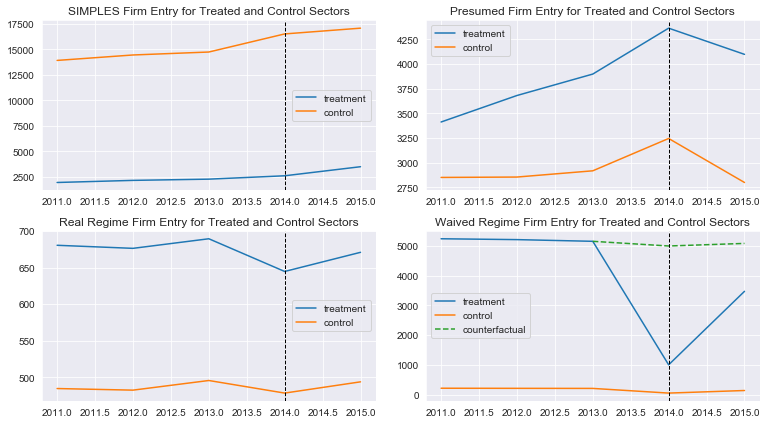

In [128]:
plt.figure(figsize = (11,6))
plt.subplot(2,2,1)
plt.plot(np.arange(2011,2016,1), np.mean(treated_group[simples]), label = 'treatment')
plt.plot(np.arange(2011,2016,1), np.mean(control_group[simples]), label = 'control')
plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.legend()
plt.title("SIMPLES Firm Entry for Treated and Control Sectors")


plt.subplot(2,2,2)
plt.plot(np.arange(2011,2016,1), np.mean(treated_group[presumed]), label = 'treatment')
plt.plot(np.arange(2011,2016,1), np.mean(control_group[presumed]), label = 'control')
plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.legend()
plt.title("Presumed Firm Entry for Treated and Control Sectors")


plt.subplot(2,2,3)
plt.plot(np.arange(2011,2016,1), np.mean(treated_group[real]), label = 'treatment')
plt.plot(np.arange(2011,2016,1), np.mean(control_group[real]), label = 'control')
plt.legend()
plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.title("Real Regime Firm Entry for Treated and Control Sectors")


plt.subplot(2,2,4)
plt.plot(np.arange(2011,2016,1), np.mean(treated_group[waived]), label = 'treatment')
plt.plot(np.arange(2011,2016,1), np.mean(control_group[waived]), label = 'control')

diff2 = np.mean(treated_group[waived[2]])-np.mean(control_group[waived[2]])
plt.plot(np.arange(2013, 2016 ,1), np.mean(control_group[waived[2:]]+ diff2), linestyle = '--', 
         label = 'counterfactual')

plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.legend()
plt.title("Waived Regime Firm Entry for Treated and Control Sectors")

plt.tight_layout()
plt.show()


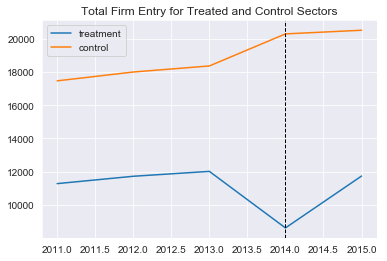

In [130]:
plt.plot(np.arange(2011,2016,1), np.mean(treated_group[total]), label = 'treatment')
plt.plot(np.arange(2011,2016,1), np.mean(control_group[total]), label = 'control')
plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.legend()
plt.title("Total Firm Entry for Treated and Control Sectors")
plt.show()

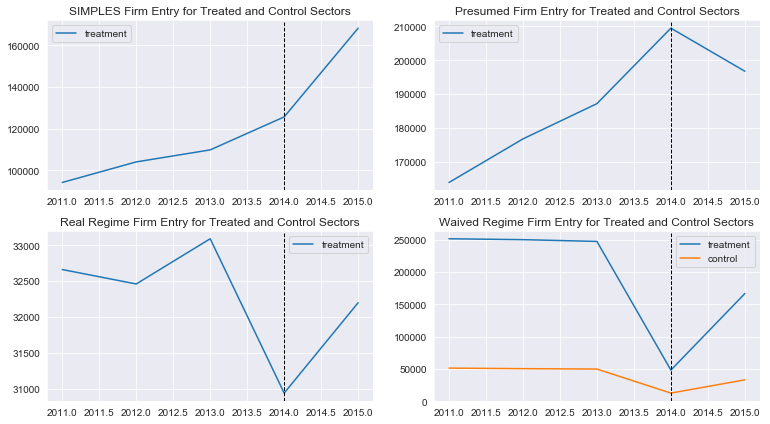

In [137]:
plt.figure(figsize = (11,6))
plt.subplot(2,2,1)
plt.plot(np.arange(2011,2016,1), np.sum(treated_group[simples]), label = 'treatment')

plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.legend()
plt.title("SIMPLES Firm Entry for Treated and Control Sectors")


plt.subplot(2,2,2)
plt.plot(np.arange(2011,2016,1), np.sum(treated_group[presumed]), label = 'treatment')

plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.legend()
plt.title("Presumed Firm Entry for Treated and Control Sectors")


plt.subplot(2,2,3)
plt.plot(np.arange(2011,2016,1), np.sum(treated_group[real]), label = 'treatment')

plt.legend()
plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.title("Real Regime Firm Entry for Treated and Control Sectors")


plt.subplot(2,2,4)
plt.plot(np.arange(2011,2016,1), np.sum(treated_group[waived]), label = 'treatment')
plt.plot(np.arange(2011,2016,1), np.sum(control_group[waived]), label = 'control')



plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.legend()
plt.title("Waived Regime Firm Entry for Treated and Control Sectors")

plt.tight_layout()
plt.show()


In [125]:
treated_group.head()

,sheet,firms_real_11,firms_real_12,firms_real_13,firms_real_14,firms_real_15,firms_presumed_11,firms_presumed_12,firms_presumed_13,firms_presumed_14,...,revenue_waived_11,revenue_waived_12,revenue_waived_13,revenue_waived_14,revenue_waived_15,revenue_total_11,revenue_total_12,revenue_total_13,revenue_total_14,revenue_total_15
19,58,114,120,130,135,144,116,135,115,109,...,0.0,0,0,0.0,0.0,22584.0,19010.0,16824.0,17944.0,24923.0
30,91,179,185,200,206,215,1122,1076,1006,1842,...,2.0,0,0,0.0,0.0,45436.0,46927.0,48739.0,64625.0,79497.0
31,94,227,233,237,233,227,346,351,343,333,...,0.0,0,0,0.0,0.0,27149.0,28183.0,30975.0,32011.0,34670.0
33,100,24,23,19,30,29,45,44,42,48,...,0.0,0,0,0.0,0.0,11084.0,11897.0,12125.0,18165.0,17049.0
64,192,475,488,488,481,497,757,759,734,737,...,0.0,0,0,0.0,0.0,36069.0,42830.0,47595.0,52384.0,59719.0


**It seems like the revenue diff in diff doesn't have a very clear relationship**

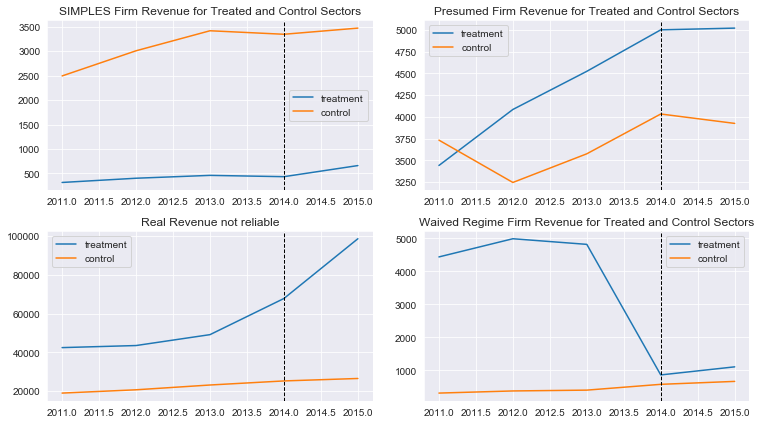

In [126]:
plt.figure(figsize = (11,6))
plt.subplot(2,2,1)
plt.plot(np.arange(2011,2016,1), np.mean(treated_group[revenue_simples]), label = 'treatment')
plt.plot(np.arange(2011,2016,1), np.mean(control_group[revenue_simples]), label = 'control')
plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.legend()
plt.title("SIMPLES Firm Revenue for Treated and Control Sectors")


plt.subplot(2,2,2)
plt.plot(np.arange(2011,2016,1), np.mean(treated_group[revenue_presumed]), label = 'treatment')
plt.plot(np.arange(2011,2016,1), np.mean(control_group[revenue_presumed]), label = 'control')
plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.legend()
plt.title("Presumed Firm Revenue for Treated and Control Sectors")


plt.subplot(2,2,3)
plt.plot(np.arange(2011,2016,1), np.mean(treated_group[revenue_real]), label = 'treatment')
plt.plot(np.arange(2011,2016,1), np.mean(control_group[revenue_real]), label = 'control')
plt.legend()
plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.title("Real Revenue not reliable")


plt.subplot(2,2,4)
plt.plot(np.arange(2011,2016,1), np.mean(treated_group[revenue_waived]), label = 'treatment')
plt.plot(np.arange(2011,2016,1), np.mean(control_group[revenue_waived]), label = 'control')

plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)
plt.legend()
plt.title("Waived Regime Firm Revenue for Treated and Control Sectors")

plt.tight_layout()
plt.show()

# loading regression package 

In [127]:
import statsmodels.formula.api as sm

In [128]:
treated_group['treated14'] = 1
control_group['treated14'] = 0

In [129]:
treated_and_control = treated_group.append(control_group).sort_values('sheet', ascending = True)

In [130]:
treated_and_control[['sheet', 'treated14']].head()

,sheet,treated14
1,4,0
2,7,0
3,10,0
4,13,0
5,16,0


regresss simples on firm 

In [139]:
result = sm.ols(formula="firms_waived_14 ~ treated14", data= treated_and_control).fit()

In [140]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        firms_waived_14   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     13.78
Date:                Thu, 27 Aug 2020   Prob (F-statistic):           0.000247
Time:                        17:18:05   Log-Likelihood:                -2508.9
No. Observations:                 285   AIC:                             5022.
Df Residuals:                     283   BIC:                             5029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.1392    104.961      0.506      0.6

**It seems like the OLS regression is significant only for waived tax regime**

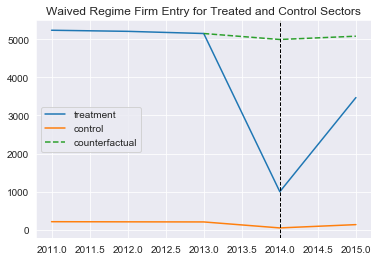

In [135]:

plt.plot(np.arange(2011,2016,1), np.mean(treated_group[waived]), label = 'treatment')


plt.plot(np.arange(2011,2016,1), np.mean(control_group[waived]), label = 'control')

diff2 = np.mean(treated_group[waived[2]])-np.mean(control_group[waived[2]])
plt.plot(np.arange(2013, 2016 ,1), np.mean(control_group[waived[2:]]+ diff2), linestyle = '--', 
         label = 'counterfactual')


plt.axvline(x=2014, color = 'black', linestyle = '--', linewidth = 1)


plt.legend()
plt.title("Waived Regime Firm Entry for Treated and Control Sectors")
plt.show()

- Review graphs
- regressions in stata dataset
- figure out how to put into stata